In [125]:
import pandas as pd
import numpy as np

gas = "N2O_CH4_CO"
species = "triple"
noise = 0.05

# Load original spectra
df = pd.read_csv(gas + '_spectra_' + species + '.csv', index_col=0)

def add_positive_noise(spectrum, noise_level=noise):
    max_val = spectrum.max()
    noise_amplitude = max_val * noise_level
    noise = np.random.uniform(0, noise_amplitude, size=spectrum.shape)
    return spectrum + noise

# Apply noise row-wise to all spectra
noisy_df = df.apply(add_positive_noise, axis=1)

# Save noisy spectra to CSV
noisy_df.to_csv(gas + '_spectra_' + species + '_noisy.csv')


N2O    0.081564
CH4    0.174865
CO     0.108937
Name: 2, dtype: float64


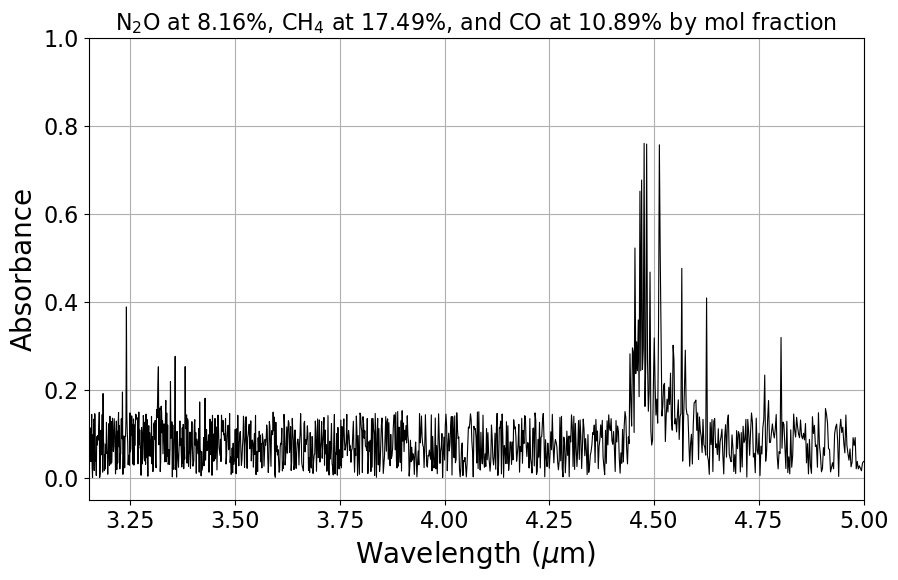

In [124]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

df1 = pd.read_csv(gas + '_spectra_' + species + '.csv', index_col=0)
df2 = pd.read_csv(gas + '_spectra_' + species + '_noisy.csv', index_col=0)
labels_df = pd.read_csv(f"{gas}_label_triple.csv")

# Select row by iloc (e.g., the 0th spectrum)
row_idx = 2
spectrum = df2.iloc[row_idx]
print(labels_df.iloc[row_idx])

#spectrum_smooth = savgol_filter(spectrum, window_length=7, polyorder=2)

# Convert column headers (wavelengths) to float for x-axis
wavelengths = df.columns.astype(float)

plt.figure(figsize=(10, 6))
plt.plot(wavelengths/1000, spectrum, color='black', linewidth=0.8)
plt.xlabel('Wavelength ($\mu$m)', fontsize=20)
plt.ylabel('Absorbance', fontsize=20)
plt.xlim(3.15,5)
plt.ylim(-0.05,1)
#plt.title(f'N$_2$O at 8.16% by mol fraction', fontsize=25)
plt.title(f'N$_2$O at 8.16%, CH$_4$ at 17.49%, and CO at 10.89% by mol fraction', fontsize=16)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
